In [1]:
# Generated in 4_Train_Score_split
#run = "train_df" 
#score = "score_df"

run = "df_int"

## Igel

This notebook implements `Igel`

> Igel supports all sklearn's machine learning functionality, whether regression, classification or clustering. Precisely, you can use 63 different machine learning model in igel.

Igel's supported models:

        +--------------------+----------------------------+-------------------------+
        |      regression    |        classification      |        clustering       |
        +--------------------+----------------------------+-------------------------+
        |   LinearRegression |         LogisticRegression |                  KMeans |
        |              Lasso |                      Ridge |     AffinityPropagation |
        |          LassoLars |               DecisionTree |                   Birch |
        | BayesianRegression |                  ExtraTree | AgglomerativeClustering |
        |    HuberRegression |               RandomForest |    FeatureAgglomeration |
        |              Ridge |                 ExtraTrees |                  DBSCAN |
        |  PoissonRegression |                        SVM |         MiniBatchKMeans |
        |      ARDRegression |                  LinearSVM |    SpectralBiclustering |
        |  TweedieRegression |                      NuSVM |    SpectralCoclustering |
        | TheilSenRegression |            NearestNeighbor |      SpectralClustering |
        |    GammaRegression |              NeuralNetwork |               MeanShift |
        |   RANSACRegression | PassiveAgressiveClassifier |                  OPTICS |
        |       DecisionTree |                 Perceptron |                    ---- |
        |          ExtraTree |               BernoulliRBM |                    ---- |
        |       RandomForest |           BoltzmannMachine |                    ---- |
        |         ExtraTrees |       CalibratedClassifier |                    ---- |
        |                SVM |                   Adaboost |                    ---- |
        |          LinearSVM |                    Bagging |                    ---- |
        |              NuSVM |           GradientBoosting |                    ---- |
        |    NearestNeighbor |        BernoulliNaiveBayes |                    ---- |
        |      NeuralNetwork |      CategoricalNaiveBayes |                    ---- |
        |         ElasticNet |       ComplementNaiveBayes |                    ---- |
        |       BernoulliRBM |         GaussianNaiveBayes |                    ---- |
        |   BoltzmannMachine |      MultinomialNaiveBayes |                    ---- |
        |           Adaboost |                       ---- |                    ---- |
        |            Bagging |                       ---- |                    ---- |
        |   GradientBoosting |                       ---- |                    ---- |
        +--------------------+----------------------------+-------------------------+

In [2]:
#Fit
algo_fit = 'yaml/forest.yaml'

# Evaluate
algo_eval = 'yaml/hyper.yaml'

# Predict
algo_predict = 'yaml/forest.yaml'   # hyper, forest

# Options [cluster, hyper, iris, regres, forest]

In [3]:
import pandas as pd
import seaborn as sns
from igel import Igel

# Algorithm selection


- [cluster,cluster,cluster] working
- [cluster,hyper,hyper] working
- `['forest'->`hyper`->`hyper`]

In [4]:
# Import
df = pd.read_csv(run + ".csv")

# Timestamp will need to be reconfigured as index on each load
#df = df.set_index('timestamp')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
   
#df = df.replace(r'\D+', '', regex=True)
df

,tweet_id,priority,postCategories_x
0,2.115660e+17,0.75,19.0
1,2.116544e+17,0.50,15.0
2,2.116813e+17,0.25,15.0
3,2.116856e+17,0.25,16.0
4,2.118770e+17,0.25,7.0
...,...,...,...
938,3.963360e+17,0.25,15.0
939,3.963361e+17,0.25,15.0
940,3.963362e+17,0.25,15.0
941,3.963363e+17,0.25,7.0


## Fit

In [5]:
# provide the arguments in a dictionary
params = {
        'cmd': 'fit',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_fit
}

Igel(**params)


INFO - Entered CLI args: {'cmd': 'fit', 'data_path': 'df_int.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: fit ...
INFO - reading data from df_int.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}}, 'model': {'type': 'classification', 'algorithm': 'RandomForest', 'arguments': {'n_estimators': 100, 'max_depth': 30}}, 'target': ['postCategories_x']}
INFO - dataset_props: {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}} 
model_props: {'type': 'classificatio

In [6]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'evaluate',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_eval
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': 'df_int.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from df_int.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - result path: /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results 
INFO - loading model form /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav 
INFO - dataset shape: (943, 3)
INFO - dataset attributes: ['tweet_id', 'priority', 'postCategories_x']
INFO - Check for missing values in the dataset ...  
tweet_id            0
priority            0
postCategories_x    0
dtype: int64  
 ----------------------------------------------------------------------------------------------------
INFO - shape of the dataset after handling missing values => (943, 3)
INFO - y shape: (943, 1) and x shape: (943, 2)
INFO - performing a standard scaling ..

In [7]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'predict',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_predict
}

Igel(**params)



INFO - Entered CLI args: {'cmd': 'predict', 'data_path': 'df_int.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: predict ...
INFO - reading data from df_int.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - loading from /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - dataset shape: (943, 3)
INFO - dataset attributes: ['tweet_id', 'priority', 'postCategories_x']
INFO - Check for missing values in the dataset ...  
tweet_id            0
priority            0
postCategories_x    0
dtype: int64  
 ----------------------------------------------------------------------------------------------------
INFO - shape of the dataset after handling missing values => (943, 3)
INFO - performing a standard scaling ...
ERROR - Error while preparing predictions: Number of features of the model must match the input. Model n_features is 2 and input n_features is 3 
T

In [8]:
# Predictions

In [9]:
res = pd.read_csv("model_results/predictions.csv")
#res.reset_index()
res



,result
0,14
1,14
2,14
3,14
4,14
...,...
938,5
939,5
940,5
941,5


In [10]:
second_source = pd.read_csv("df_int.csv")
second_source = df.loc[:, ~df.columns.str.contains('^Unnamed')]

second_source

,tweet_id,priority,postCategories_x
0,2.115660e+17,0.75,19.0
1,2.116544e+17,0.50,15.0
2,2.116813e+17,0.25,15.0
3,2.116856e+17,0.25,16.0
4,2.118770e+17,0.25,7.0
...,...,...,...
938,3.963360e+17,0.25,15.0
939,3.963361e+17,0.25,15.0
940,3.963362e+17,0.25,15.0
941,3.963363e+17,0.25,7.0


In [17]:
df = second_source.merge(res, left_index=True, right_index=True)
df

,tweet_id,priority,postCategories_x,result
0,2.115660e+17,0.75,19.0,14
1,2.116544e+17,0.50,15.0,14
2,2.116813e+17,0.25,15.0,14
3,2.116856e+17,0.25,16.0,14
4,2.118770e+17,0.25,7.0,14
...,...,...,...,...
938,3.963360e+17,0.25,15.0,5
939,3.963361e+17,0.25,15.0,5
940,3.963362e+17,0.25,15.0,5
941,3.963363e+17,0.25,7.0,5


In [18]:
#df = df.sort_values(by=['result'])
df

,tweet_id,priority,postCategories_x,result
0,2.115660e+17,0.75,19.0,14
1,2.116544e+17,0.50,15.0,14
2,2.116813e+17,0.25,15.0,14
3,2.116856e+17,0.25,16.0,14
4,2.118770e+17,0.25,7.0,14
...,...,...,...,...
938,3.963360e+17,0.25,15.0,5
939,3.963361e+17,0.25,15.0,5
940,3.963362e+17,0.25,15.0,5
941,3.963363e+17,0.25,7.0,5


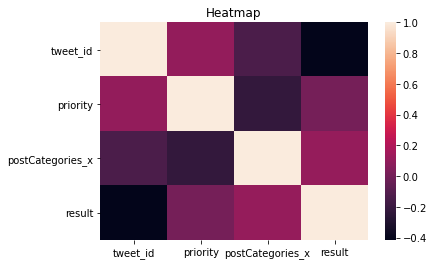

In [19]:
import matplotlib.pyplot as plt


sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [20]:
df.loc[df['result'] == 20]



INFO - NumExpr defaulting to 4 threads.


,tweet_id,priority,postCategories_x,result
336,2.750354e+17,0.25,11.0,20
337,2.750451e+17,0.75,23.0,20
338,2.750653e+17,0.50,1.0,20
339,2.750849e+17,0.50,4.0,20
340,2.750862e+17,0.50,10.0,20
341,2.750870e+17,0.25,21.0,20
342,2.750911e+17,0.25,18.0,20
343,2.750947e+17,0.25,15.0,20
344,2.750956e+17,0.25,15.0,20
345,2.751056e+17,0.25,11.0,20


In [ ]:
mergedDf.to_csv("results_merged.csv", index=False)
df = pd.read_csv("results_merged.csv")
df

In [22]:
df

,tweet_id,priority,postCategories_x,result
0,2.115660e+17,0.75,19.0,14
1,2.116544e+17,0.50,15.0,14
2,2.116813e+17,0.25,15.0,14
3,2.116856e+17,0.25,16.0,14
4,2.118770e+17,0.25,7.0,14
...,...,...,...,...
938,3.963360e+17,0.25,15.0,5
939,3.963361e+17,0.25,15.0,5
940,3.963362e+17,0.25,15.0,5
941,3.963363e+17,0.25,7.0,5
